# Лабораторная работа 4.
### Доверительные интервалы для математического ожидания и дисперсии СВ.

In [149]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import norm

*Так как в процессе выполнения работы потребуется сформировать выборку из n случайных чисел в соответствии с заданным в типовом расчете Y = f(xᵢ), где Xᵢ - равномерно распределенное число из заданного интервала [a, b], i = 1, ...n, определяются соответствующие функции и интервал:*

In [150]:
a = -2
b = 2

#  Y = f(xᵢ)
def Y(x):
    return x*x

In [151]:
# формирование вариационного ряда
def generation_of_the_row(n):
    eps = [np.random.uniform(0, 1) for i in range(n)]
    x = [(ei * (b - a) + a) for ei in eps]
    y = [Y(xi) for xi in x]
    variation = sorted(y)
    return variation

*Формирование выборки объемом n:*

In [152]:
n = int(input("Enter n. "))

Enter n. 20


In [153]:
variation = generation_of_the_row(n)

*Рассчитаны теоретические значения дисперсии и матожидания случайной величины Y при использовании найденной в предыдущих работах функции плотности СВ Y:*

In [154]:
mo = 4/3
dispersion = 64/45
s = dispersion ** 0.5

*Точечная оценка математического ожидания:*

In [155]:
mo_estimation = sum(variation) / n
print("Точечная оценка матожидания: ", "%.4f" % mo_estimation)
print("Матожидание:", "%.4f" % mo)

Точечная оценка матожидания:  1.2577
Матожидание: 1.3333


*Точечная несмещенная оценка дисперсии:*

In [156]:
dispersion_estimation = sum([(x - mo_estimation)**2 for x in variation]) / (n - 1)
s_estimated = dispersion_estimation ** 0.5    #СКО
print("Точечная оценка дисперсии: ", "%.4f" % dispersion_estimation)
print("Дисперсия - ",  "%.4f" % dispersion)

Точечная оценка дисперсии:  2.2289
Дисперсия -  1.4222


*Доверительный интервал для оценки математического ожидания случайной величины для уровней значимости 0.99, 0.98, 0.95 (при неизвестной и известной дисперсии):*

In [157]:
def confidence_interval_for_expected_value(n, a, mo_es, s_e):
    print("Доверительный интервал для матожидания со значимостью ", 1 - a, ": ",
          "%.4f" % (mo_es - s_e*t.ppf(1 - a / 2, n - 1) / n**0.5), " ≤ mₓ ≤ ",
          "%.4f" % (mo_es + s_e*t.ppf(1 - a / 2, n - 1) / n**0.5))


def confidence_interval_for_expected_value_with_dispersion(n, a, mo_es):
    print("Доверительный интервал для матожидания с известной дисперсией со значимостью ", 1 - a, ": ",
          "%.4f" % (mo_es - s * norm.ppf(1-a/2.0) / n ** 0.5), " ≤ mₓ ≤ ",
          "%.4f" % (mo_es + s * norm.ppf(1-a/2.0) / n ** 0.5))


def confidence_intervals_for_expected_values(n, mo_es, s_e):
    a_values = [0.01, 0.02, 0.05]
    for a in a_values:
        confidence_interval_for_expected_value(n, a, mo_es, s_estimated)
    for a in a_values:
        confidence_interval_for_expected_value_with_dispersion(n, a, mo_es)
        

In [158]:
confidence_intervals_for_expected_values(n, mo_estimation, s_estimated)

Доверительный интервал для матожидания со значимостью  0.99 :  0.3026  ≤ mₓ ≤  2.2127
Доверительный интервал для матожидания со значимостью  0.98 :  0.4099  ≤ mₓ ≤  2.1054
Доверительный интервал для матожидания со значимостью  0.95 :  0.5589  ≤ mₓ ≤  1.9564
Доверительный интервал для матожидания с известной дисперсией со значимостью  0.99 :  0.5708  ≤ mₓ ≤  1.9446
Доверительный интервал для матожидания с известной дисперсией со значимостью  0.98 :  0.6373  ≤ mₓ ≤  1.8780
Доверительный интервал для матожидания с известной дисперсией со значимостью  0.95 :  0.7350  ≤ mₓ ≤  1.7803


*График зависимости величины доверительного интервала матожидания от уровня значимости (с неизвестной и известной дисперсией):*

In [159]:
def confidence_interval_dependency(n, s_es):
    a_list = np.arange(0, 1, 0.001)
    interval_list = [2 * s_es * t.ppf(1 - a / 2, n - 1) / n ** 0.5 for a in a_list]
    interval_list_with_dispersion = [2 * s / n ** 0.5 * norm.ppf(1-a/2.0) for a in a_list]
    plt.plot(1 - a_list, interval_list, label='Без известной дисперсии')
    plt.plot(1 - a_list, interval_list_with_dispersion, label='С известной дисперсией')
    plt.title("Зависимость величины доверительного интервала\n матожидания от уровня значимости")
    plt.legend()
    plt.show()

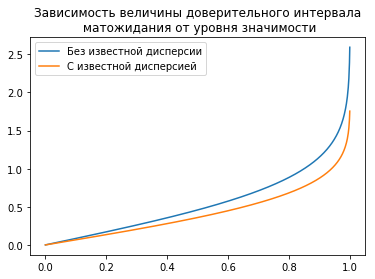

In [160]:
confidence_interval_dependency(n, s_estimated)

*График зависимости величины доверительного интервала матожидания от объема выборки:*

In [161]:
def confidence_interval_volume_dependency():
    laplace_function = lambda x: erf(x / 2 ** 0.5)
    a = 0.01
    n_list = np.arange(10, 251, 1)
    interval_list = []
    interval_list_with_dispersion = []
    for n in n_list:
        var = generation_of_the_row(n)
        mo_es = sum(var) / n
        dispersion_es = sum([(x - mo_es) ** 2 for x in var]) / (n - 1)
        interval_list.append(2 * dispersion_es ** 0.5 * t.ppf(1 - a / 2, n - 1) / (n) ** 0.5)
        interval_list_with_dispersion.append(2 * s / n**0.5 * norm.ppf(1 - a / 2.0))
    plt.plot(n_list, interval_list, label='Без известной дисперсии')
    plt.plot(n_list, interval_list_with_dispersion, label='С известной дисперсией')
    plt.title("Зависимость величины доверительного интервала матожидания\n"
              " от объёма выборки с доверительным значением " + str(1 - a))
    plt.legend()
    plt.show()

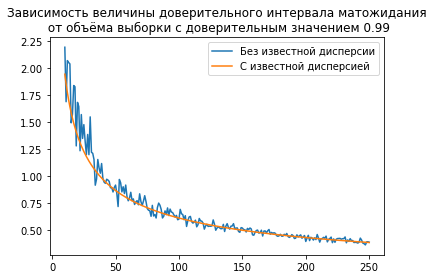

In [162]:
confidence_interval_volume_dependency()

*Доверительный интервал для оценки дисперсии случайной величины для уровней значимости 0.99, 0.98, 0.95 (при неизвестном и известном математическом ожидании):*

In [180]:
def confidence_interval_for_dispersion(n, a, s_es):
    print("Доверительный интервал для дисперсии со значимостью ", 1 - a, ": ",
          "%.4f" % ((n - 1) * s_es**2 / chi2.isf((1 - (1 - a)) / 2, n - 1)), " ≤ Dₓ ≤ ",
          "%.4f" % ((n - 1) * s_es**2 / chi2.isf((1 + (1 - a)) / 2, n - 1)))


def confidence_interval_for_dispersion_with_estimation(n, a, var):
    dispersion_es = (sum([(x - mo)**2 for x in var]) / (n - 1))
    print("Доверительный интервал для дисперсии с известным матожиданием со значимостью ", 1 - a, ": ",
          "%.4f" % (n * dispersion_es / chi2.isf((1 - (1 - a)) / 2, n)), " ≤ Dₓ ≤ ",
          "%.4f" % (n*dispersion_es / chi2.isf((1 + (1 - a)) / 2, n)))


def confidence_interval_for_all_dispersions(n, s_es, var):
    a_values = [0.01, 0.02, 0.05]
    for a in a_values:
        confidence_interval_for_dispersion(n, a, s_es)
    print()
    for a in a_values:
        confidence_interval_for_dispersion_with_estimation(n, a, var)     

In [181]:
confidence_interval_for_all_dispersions(n, s_estimated, variation)  

Доверительный интервал для дисперсии со значимостью  0.99 :  1.0976  ≤ Dₓ ≤  6.1877
Доверительный интервал для дисперсии со значимостью  0.98 :  1.1701  ≤ Dₓ ≤  5.5482
Доверительный интервал для дисперсии со значимостью  0.95 :  1.2890  ≤ Dₓ ≤  4.7547

Доверительный интервал для дисперсии с известным матожиданием со значимостью  0.99 :  1.1175  ≤ Dₓ ≤  6.0127
Доверительный интервал для дисперсии с известным матожиданием со значимостью  0.98 :  1.1898  ≤ Dₓ ≤  5.4111
Доверительный интервал для дисперсии с известным матожиданием со значимостью  0.95 :  1.3081  ≤ Dₓ ≤  4.6605


*График зависимости величины доверительного интервала дисперсии от уровня значимости (с неизвестным и известным матожиданием):*

In [175]:
def confidence_interval_dependency_for_dispersion(n, var, d_es):
    a_list = np.arange(0.001, 1, 0.001)
    interval_list = [(n - 1) * d_es / chi2.isf((1 + (1 - a)) / 2, n - 1) -
                     (n - 1) * d_es / chi2.isf((1 - (1 - a)) / 2, n - 1) for a in a_list]
    dispersion_es_with_mo = sum([(x - mo) ** 2 for x in var]) / (n - 1)
    interval_list_with_mo = [n*dispersion_es_with_mo / chi2.isf((1 + (1 - a)) / 2, n) -
                     n * dispersion_es_with_mo / chi2.isf((1 - (1 - a)) / 2, n) for a in a_list]
    plt.plot(1 - a_list, interval_list, label='Без известного матожидания')
    plt.plot(1 - a_list, interval_list_with_mo, label='С известным МО')
    plt.title("Зависимость величины доверительного интервала\n дисперсии от уровня значимости")
    plt.legend()
    plt.show()

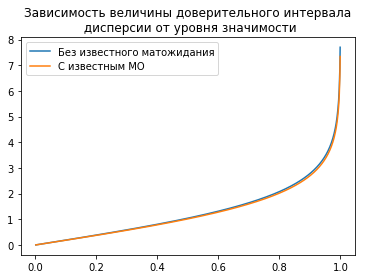

In [176]:
confidence_interval_dependency_for_dispersion(n, variation, dispersion_estimation) 

*График зависимости величины доверительного интервала дисперсии от объема выборки (с неизвестным и известным матожиданием):*

In [177]:
def confidence_interval_volume_dependency_for_dispersion():
    a = 0.01
    n_list = np.arange(15, 151, 1)
    interval_list = []
    interval_list_with_mo = []
    for n in n_list:
        var = generation_of_the_row(n)
        mo_es = sum(var) / n
        dispersion_es = sum([(x - mo_es) ** 2 for x in var]) / (n - 1)
        interval_list.append((n - 1)*dispersion_es / chi2.isf((1 + (1 - a)) / 2, n - 1) -
                             (n - 1) * dispersion_es / chi2.isf((1 - (1 - a)) / 2, n - 1))
        dispersion_es_with_mo = sum([(x - mo) ** 2 for x in var]) / (n - 1)
        interval_list_with_mo.append(n*dispersion_es_with_mo / chi2.isf((1 + (1 - a)) / 2, n) -
                     n * dispersion_es_with_mo / chi2.isf((1 - (1 - a)) / 2, n))
    plt.plot(n_list, interval_list, label='Без известного матожидания')
    plt.plot(n_list, interval_list_with_mo, label='С известным МО')
    plt.title(
        "Зависимость величины доверительного интервала дисперсии\n от объёма выборки с доверительным значением " + str(1 - a))
    plt.legend()
    plt.show()

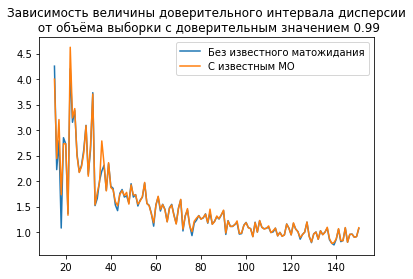

In [178]:
confidence_interval_volume_dependency_for_dispersion()